___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data


First we need to start with the proper imports, which we've already laid out for you here.

### The Imports


In [43]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [the documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions ( Use google finance as a source) example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [64]:
BAC = data.DataReader("BAC", 'google', start, end)
C = data.DataReader("C", 'google', start, end)
GS = data.DataReader("GS", 'google', start, end)
JPM = data.DataReader("JPM", 'google', start, end)
MS = data.DataReader("MS", 'google', start, end)
WFC = data.DataReader("WFC", 'google', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [25]:
tick = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.**

In [28]:
bs = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tick)

In [30]:
bs.head()

BAC                                      C                       \
             Open   High    Low  Close     Volume   Open   High    Low  Close   
Date                                                                            
2016-10-24  16.75  16.80  16.61  16.77   68244817  49.82  49.88  49.52  49.58   
2016-10-25  16.71  16.82  16.68  16.72   49350278  49.49  49.80  49.30  49.59   
2016-10-26  16.64  16.87  16.62  16.87   58730367  49.27  50.06  49.21  50.01   
2016-10-27  16.95  17.10  16.86  16.91   97937253  50.32  50.60  49.90  49.93   
2016-10-28  16.95  16.98  16.50  16.68  115123601  49.98  50.12  48.95  49.56   

                        ...        MS                                   WFC  \
              Volume    ...      Open   High    Low  Close    Volume   Open   
Date                    ...                                                   
2016-10-24  10753462    ...     33.57  33.68  33.34  33.38   9221301  45.45   
2016-10-25   9790517    ...     33.39  33.59  33.20  33.35   7912666  45.47   
2016-10-26  13960034    ...     33.15  33.65  33.06  33.59   9112972  45.46   
2016-10-27  19181449    ...     33.82  34.00  33.58  33.82  12608435  46.42   
2016-10-28  17780277    ...     33.69  34.03  33.17  33.52  10183535  46.57   

                                           
             High    Low  Close    Volume  
Date                                       
2016-10-24  45.68  45.29  45.52  19303808  
2016-10-25  45.80  45.41  45.72  20402012  
2016-10-26  46.17  45.44  46.15  25181900  
2016-10-27  46.81  46.26  46.41  25661020  
2016-10-28  46.64  45.88  46.23  20882042  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [32]:
bs.columns.names = ['Bank Ticker','Stock Info']

In [33]:
bs.head()

Bank Ticker    BAC                                      C                \
Stock Info    Open   High    Low  Close     Volume   Open   High    Low   
Date                                                                      
2016-10-24   16.75  16.80  16.61  16.77   68244817  49.82  49.88  49.52   
2016-10-25   16.71  16.82  16.68  16.72   49350278  49.49  49.80  49.30   
2016-10-26   16.64  16.87  16.62  16.87   58730367  49.27  50.06  49.21   
2016-10-27   16.95  17.10  16.86  16.91   97937253  50.32  50.60  49.90   
2016-10-28   16.95  16.98  16.50  16.68  115123601  49.98  50.12  48.95   

Bank Ticker                     ...        MS                                 \
Stock Info   Close    Volume    ...      Open   High    Low  Close    Volume   
Date                            ...                                            
2016-10-24   49.58  10753462    ...     33.57  33.68  33.34  33.38   9221301   
2016-10-25   49.59   9790517    ...     33.39  33.59  33.20  33.35   7912666   
2016-10-26   50.01  13960034    ...     33.15  33.65  33.06  33.59   9112972   
2016-10-27   49.93  19181449    ...     33.82  34.00  33.58  33.82  12608435   
2016-10-28   49.56  17780277    ...     33.69  34.03  33.17  33.52  10183535   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2016-10-24   45.45  45.68  45.29  45.52  19303808  
2016-10-25   45.47  45.80  45.41  45.72  20402012  
2016-10-26   45.46  46.17  45.44  46.15  25181900  
2016-10-27   46.42  46.81  46.26  46.41  25661020  
2016-10-28   46.57  46.64  45.88  46.23  20882042  

[5 rows x 30 columns]

# Exploratory Data Analysis

Use the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions.

** What is the max Close price for each bank's stock throughout the time period?**

In [36]:
bs.xs(key='Close',axis=1,level = 'Stock Info').max()

Bank Ticker
BAC     27.17
C       75.72
GS     252.89
JPM     99.51
MS      50.68
WFC     59.73
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [37]:
r = pd.DataFrame()

In [40]:
for t in tick:
    r[t+'Return']=bs[t]['Close'].pct_change()

In [41]:
r.head()

BACReturn   CReturn  GSReturn  JPMReturn  MSReturn  WFCReturn
Date                                                                     
2016-10-24        NaN       NaN       NaN        NaN       NaN        NaN
2016-10-25  -0.002982  0.000202  0.002455  -0.001016 -0.000899   0.004394
2016-10-26   0.008971  0.008469  0.008659   0.004797  0.007196   0.009405
2016-10-27   0.002371 -0.001600  0.003840   0.001447  0.006847   0.005634
2016-10-28  -0.013601 -0.007410 -0.003432  -0.001733 -0.008870  -0.003878

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

ValueError: max must be larger than min in range parameter.

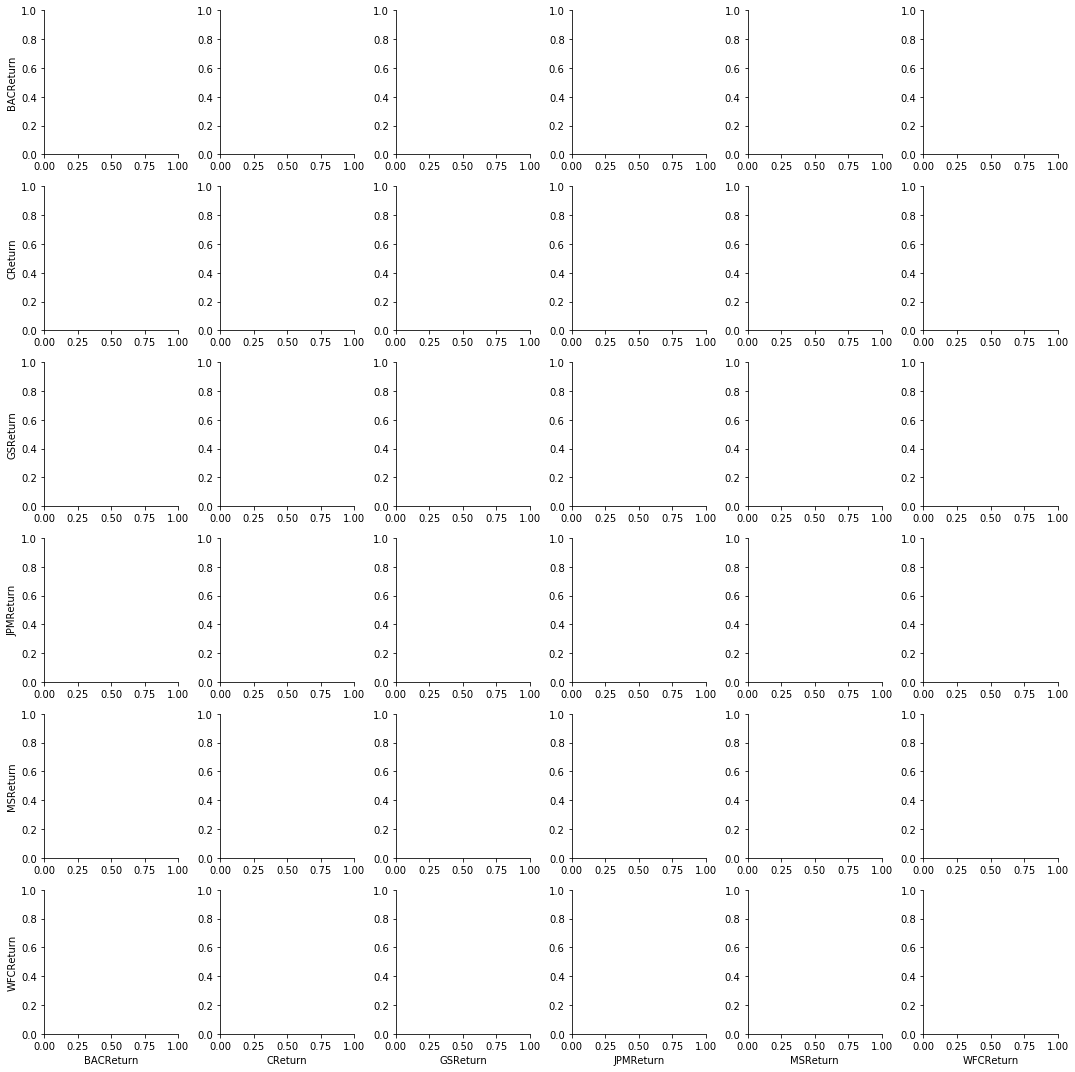

In [45]:
sns.pairplot(r)

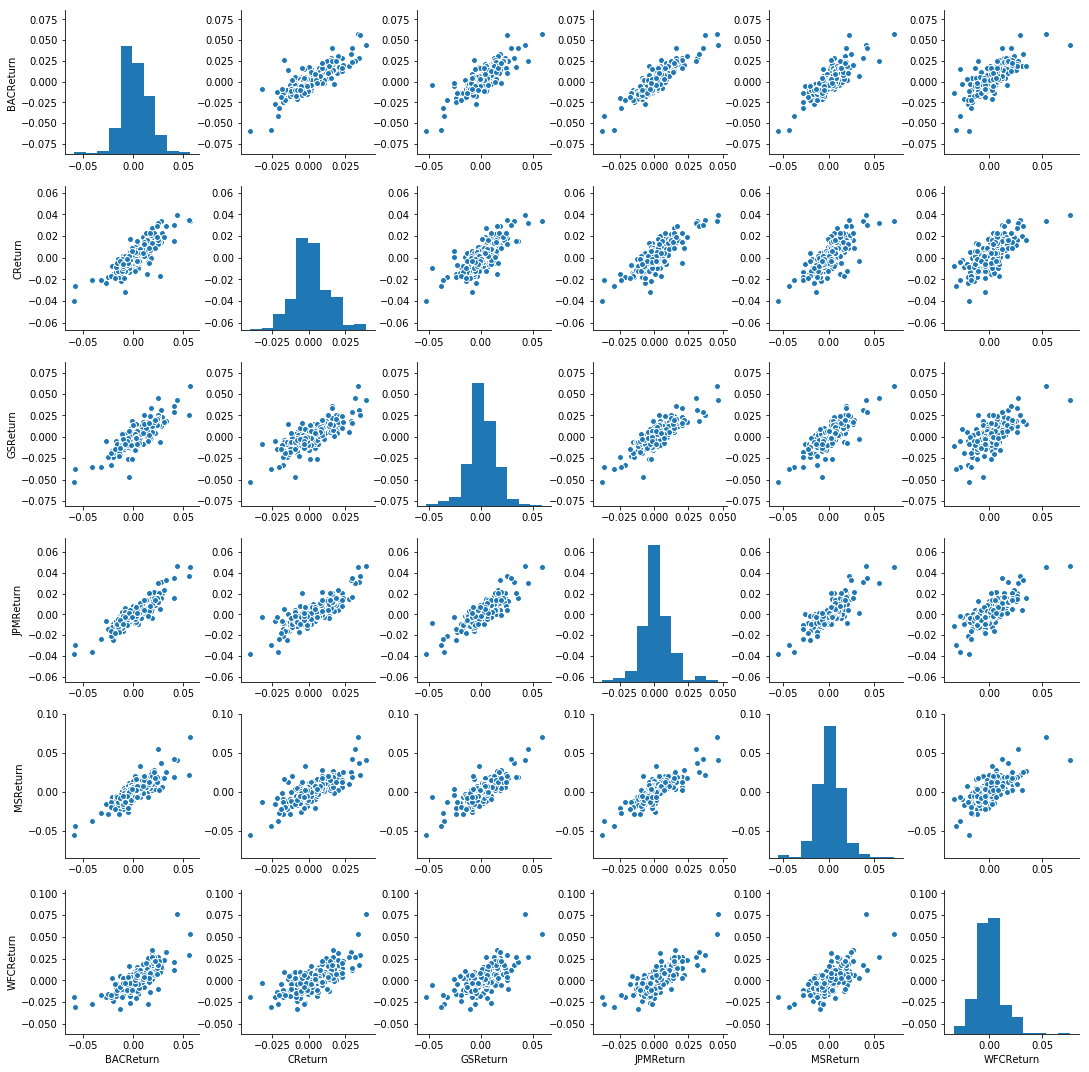

In [46]:
sns.pairplot(r[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.**

In [48]:
r.idxmin()

BACReturn   2017-05-17
CReturn     2017-05-17
GSReturn    2017-05-17
JPMReturn   2017-05-17
MSReturn    2017-05-17
WFCReturn   2017-04-13
dtype: datetime64[ns]

In [50]:
r.idxmax()

BACReturn   2016-11-09
CReturn     2016-11-10
GSReturn    2016-11-09
JPMReturn   2016-11-10
MSReturn    2016-11-09
WFCReturn   2016-11-10
dtype: datetime64[ns]

** Look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [51]:
r.std() #BAC the riskiest

BACReturn    0.015000
CReturn      0.012085
GSReturn     0.013783
JPMReturn    0.011034
MSReturn     0.014450
WFCReturn    0.012925
dtype: float64

____
# Visualization



### Imports

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import plotly
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


** Create a line plot showing Close price for each bank for the entire index of time. **

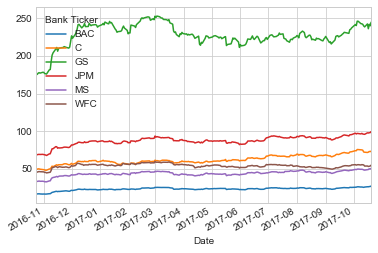

In [56]:
bs.xs(key='Close',axis=1,level='Stock Info').plot()

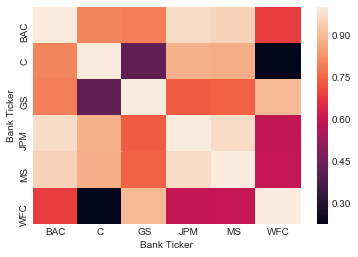

In [68]:
sns.heatmap(bs.xs(key='Close',axis=1,level='Stock Info').corr())

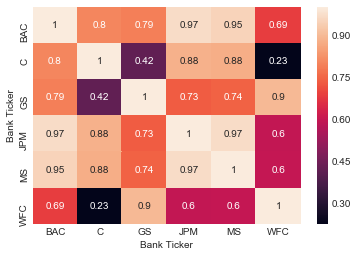

In [69]:
sns.heatmap(bs.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Use seaborn's clustermap to cluster the correlations together:**

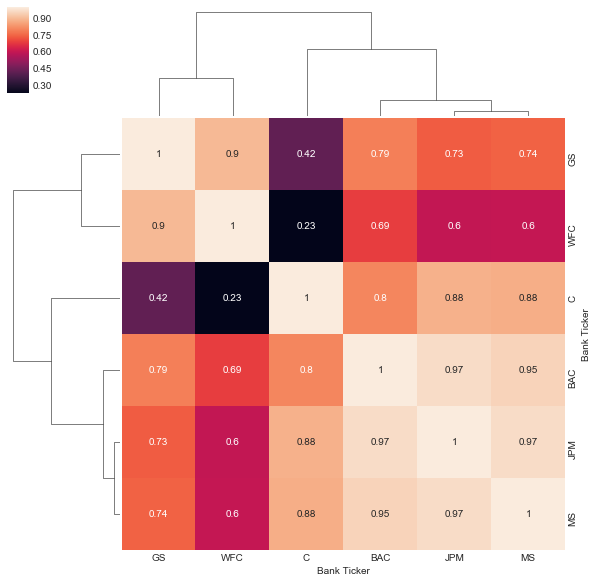

In [70]:
sns.clustermap(bs.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)